In [1]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [2]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "planning_budget"
tags = ['2024-04-25-19-54-41', '2024-04-25-21-23-45', '2024-04-26-09-48-53','2024-04-26-11-22-32']
filters = {"tags": {"$in": tags}, "state": "finished", "config.use_visit_count": True}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [3]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 45/45 [00:00<00:00, 16007.44it/s]


,Evaluation/Discounted_Returns,Training/Replay_Buffer_Size,_wandb,grad_steps,environment_steps,Self_Play/Total_Timesteps,Training/Value_Simularities,Self_Play/Total_Mean_Discounted_Return,Evaluation/Mean_Entropy,Evaluation/Entropies,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",90,{'runtime': 2684},116,7658,78,0.196364,-42.544444,9.984294e-05,"{'bins': [-0.4999001622200012, -0.484275162220...",...,0.3,4,identity,coordinate,0.000001,PolicyPUCT,6,mvc,15,identity
1,"{'bins': [-15.5, -15.484375, -15.46875, -15.45...",90,{'runtime': 2998},116,9835,113,0.492403,-54.638889,3.371855e-01,"{'_type': 'histogram', 'bins': [-0.16281449794...",...,0.3,4,identity,coordinate,0.000001,PUCT,6,mvc,15,identity
2,"{'bins': [-19.5, -19.484375, -19.46875, -19.45...",90,{'runtime': 3493},116,12719,135,0.799211,-72.311111,3.240569e-01,"{'bins': [-0.17594313621520996, -0.16031813621...",...,0.3,4,identity,coordinate,0.000001,PUCT,6,visit,15,identity
3,"{'_type': 'histogram', 'bins': [-13.5, -13.484...",90,{'runtime': 4372},116,9599,78,0.487795,-53.327778,2.782410e-06,"{'_type': 'histogram', 'bins': [-0.49999722838...",...,0.3,4,identity,coordinate,0.000001,PolicyPUCT,6,mvc,15,identity
4,"{'bins': [-15.5, -15.484375, -15.46875, -15.45...",90,{'runtime': 3700},116,10390,106,0.703163,-57.722222,2.740256e-01,"{'_type': 'histogram', 'bins': [-0.22597435116...",...,0.3,4,identity,coordinate,0.000001,PUCT,6,mvc,15,identity
5,"{'_type': 'histogram', 'bins': [-100.5, -100.4...",90,{'runtime': 4013},116,11645,122,0.731737,-64.694445,7.931486e-01,"{'_type': 'histogram', 'bins': [0.293148636817...",...,0.3,4,identity,coordinate,0.000001,PUCT,6,visit,15,identity
6,"{'_type': 'histogram', 'bins': [-13.5, -13.484...",90,{'runtime': 4455},116,9233,78,0.574316,-51.294444,4.496837e-07,"{'bins': [-0.4999995529651642, -0.484374552965...",...,0.3,4,identity,coordinate,0.000001,PolicyPUCT,6,mvc,15,identity
7,"{'_type': 'histogram', 'bins': [-15.5, -15.484...",90,{'runtime': 3402},116,9702,110,0.250803,-53.900000,3.604744e-01,"{'bins': [-0.1395256221294403, -0.123900622129...",...,0.3,4,identity,coordinate,0.000001,PUCT,6,mvc,15,identity
8,"{'_type': 'histogram', 'bins': [-17.5, -17.484...",90,{'runtime': 3674},116,11323,131,0.714132,-62.905555,3.365321e-01,"{'bins': [-0.1634678840637207, -0.147842884063...",...,0.3,4,identity,coordinate,0.000001,PUCT,6,visit,15,identity
9,"{'_type': 'histogram', 'bins': [-19.5, -19.484...",90,{'runtime': 6827},116,13716,146,0.759952,-77.300000,4.510617e-01,"{'_type': 'histogram', 'bins': [-0.04893830418...",...,0.3,4,identity,coordinate,0.000001,PUCT,6,visit,15,identity


In [4]:
df.columns

Index(['Evaluation/Discounted_Returns', 'Training/Replay_Buffer_Size',
       '_wandb', 'grad_steps', 'environment_steps',
       'Self_Play/Total_Timesteps', 'Training/Value_Simularities',
       'Self_Play/Total_Mean_Discounted_Return', 'Evaluation/Mean_Entropy',
       'Evaluation/Entropies', 'Self_Play/Mean_Discounted_Return',
       'Self_Play/Mean_Return', 'Self_Play/Mean_Timesteps',
       'Training/Regularization_loss', 'Self_Play/Discounted_Return', '_step',
       'Evaluation/Trajectories', 'Self_Play/EMA_Discounted_Return',
       'Self_Play/Min_Timesteps', 'Self_Play/Entropies',
       'Evaluation/Mean_Discounted_Returns', 'Self_Play/Timesteps', '_runtime',
       '_timestamp', 'Evaluation/Returns', 'Self_Play/Mean_Entropy',
       'Evaluation/Mean_Returns', 'Training/Value_and_Policy_loss',
       'Training/Learning_Rate', 'Self_Play/Returns', 'episodes',
       'Self_Play/Max_Return', 'Training/Value_loss', 'Self_Play/Min_Return',
       'Evaluation/Timesteps', 'Training/

In [5]:
df.discount_factor.unique()


array([1])

In [6]:
save_folder = 'outfiles'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

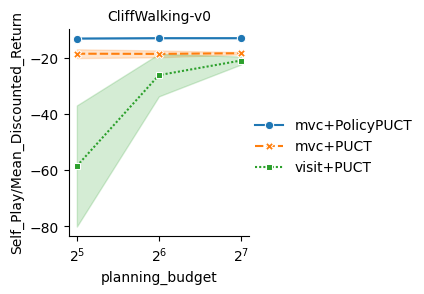

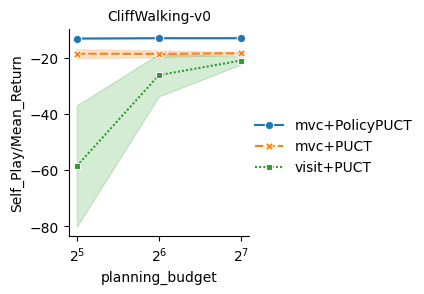

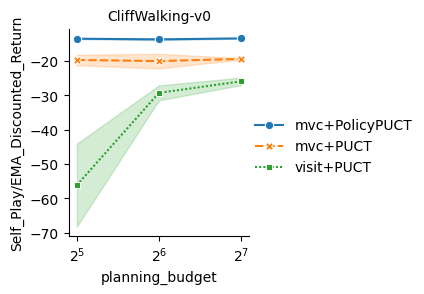

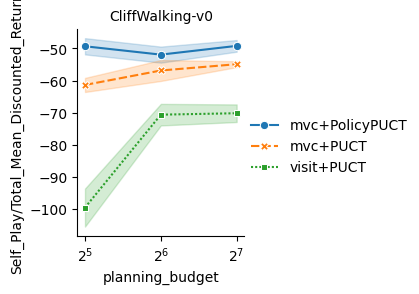

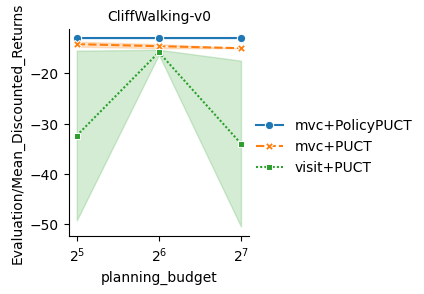

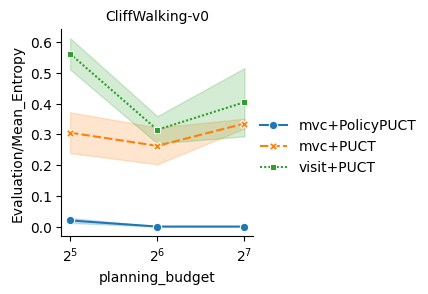

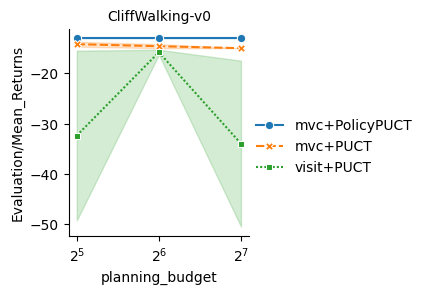

In [7]:



df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']


metrics = ['Self_Play/Mean_Discounted_Return','Self_Play/Mean_Return', 'Self_Play/EMA_Discounted_Return', 'Self_Play/Total_Mean_Discounted_Return',
           "Evaluation/Mean_Discounted_Returns", "Evaluation/Mean_Entropy", "Evaluation/Mean_Returns"]


estimator = "mean"
for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(df, col="env_description",sharex=True, sharey=False)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    for ax in g.axes.flatten():
        ax.set_xscale('log', base=2)

    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()

    # Set the titles for each subplot for clarity
    g.set_titles("{col_name}")

    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)

    plt.show()

In [8]:

env_description = "FrozenLake-v1-8x8"
runs = df[df["env_description"] == env_description]
optimum_value = runs["optimal_value"][0]

metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns",
           "max_Self_Play/Mean_Discounted_Return", "max_Evaluation/Mean_Discounted_Returns"
           ]
# calcualte number of datapoints for each policy_combination and x_metric combination
all_seeds = df.groupby(["policy_combination", x_metric]).size()
assert all_seeds.min() == all_seeds.max(), "Number of seeds is not consistent across policy_combinations and x_metric values"
n_seeds = all_seeds.min()

# plot metric vs x_metric for each policy combination
estimator = "mean"
for metric in metrics:

    # Create a line plot with confidence intervals
    sns.lineplot(data=df,
                 x=x_metric, y=metric,
                hue="policy_combination", style="policy_combination",
                markers=True, errorbar="se", estimator=estimator)

    plt.axhline(optimum_value, color='r', linestyle='--', label='Optimal Value')
    # Customize the plot with titles and labels
    # count the number in each group
    plt.title(f'{env_description} {name_fn(metric)} ({n_seeds} seeds)')
    # set range of y-axis
    plt.ylim(-.1, .55)
    # add line for optimal value

    plt.xlabel(x_metric)  # Replace with actual x-axis label
    plt.ylabel(metric)
    plt.gca().set_xscale('log', base=2)
    plt.legend(loc='lower right')

    # save as pdf
    plt.savefig(f'{save_folder}/{name_fn(metric).replace(" ", "_")}_{env_description}_{estimator}.pdf')

    # Show the plot
    plt.show()

KeyError: 0